In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import pandas as pd

In [2]:
#import images
orange = np.array(Image.open('Images/orange.png'))
red = np.array(Image.open('Images/red.png'))
turq = np.array(Image.open('Images/turq.png'))
blue = np.array(Image.open('Images/blue.jpg'))
sage = np.array(Image.open('Images/sage.png'))

In [3]:
'''
ORGANIZE DATA
above, each image has been converted to a 3d array
the third dimension contains the rgb values in the form [r, b, g]
slice the arrays to extract these values, as below:
'''
orange_df = pd.DataFrame({'Red':orange[:,:,0].flatten(),
                          'Green':orange[:,:,1].flatten(),
                          'Blue':orange[:,:,2].flatten()})
red_df = pd.DataFrame({'Red':red[:,:,0].flatten(),
                          'Green':red[:,:,1].flatten(),
                          'Blue':red[:,:,2].flatten()})
turq_df = pd.DataFrame({'Red':turq[:,:,0].flatten(),
                          'Green':turq[:,:,1].flatten(),
                          'Blue':turq[:,:,2].flatten()})
blue_df = pd.DataFrame({'Red':blue[:,:,0].flatten(),
                          'Green':blue[:,:,1].flatten(),
                          'Blue':blue[:,:,2].flatten()})
sage_df = pd.DataFrame({'Red':sage[:,:,0].flatten(),
                          'Green':sage[:,:,1].flatten(),
                          'Blue':sage[:,:,2].flatten()})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Red     250000 non-null  uint8
 1   Green   250000 non-null  uint8
 2   Blue    250000 non-null  uint8
dtypes: uint8(3)
memory usage: 732.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Red     25000 non-null  uint8
 1   Green   25000 non-null  uint8
 2   Blue    25000 non-null  uint8
dtypes: uint8(3)
memory usage: 73.4 KB


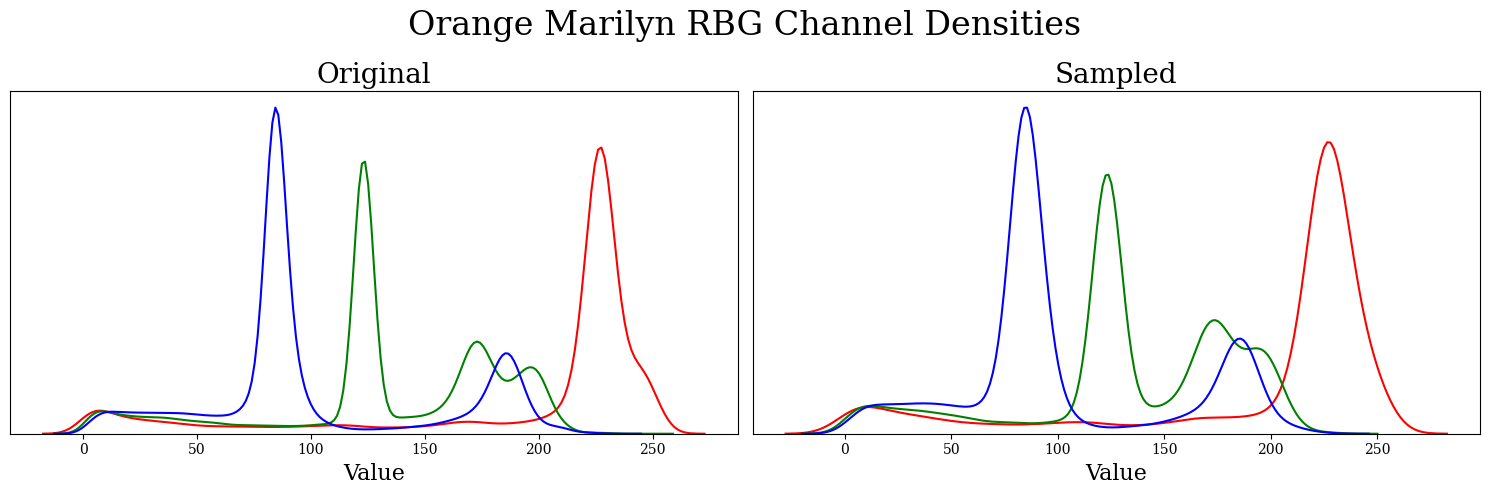

In [12]:
#compare rbg channel densities between sampled and unsampled image
#sample every 10th pixel

unsampled = orange_df
sampled = pd.DataFrame({'Red':orange[:,:,0][1::10].flatten(),
                        'Green':orange[:,:,1][1::10].flatten(),
                        'Blue':orange[:,:,2][1::10].flatten()})

#check sizes
unsampled.info()
sampled.info()

#set the font for plt
#the font used by Medium is "Charter"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Charter']

#plot
fig = plt.figure(figsize=(15, 5), layout='tight')
fig.suptitle('Orange Marilyn RGB Channel Densities', fontsize = 24)
for i, df, title in zip(range(2),
                        [unsampled, sampled],
                        ['Original', 'Sampled']):
      ax = plt.subplot(1, 2, i+1) #move to next axes in figure
      sns.kdeplot(data=df['Red'], color='red')
      sns.kdeplot(data=df['Green'], color='green')
      sns.kdeplot(data=df['Blue'], color='blue')
      plt.title(title, fontsize=20)
      plt.yticks([])
      plt.xlabel('Value', fontsize=16) 
      plt.ylabel('')

plt.show()
plt.close('all')

In [ ]:
#plot rbg channel densities

fig = plt.figure(figsize=(15, 10))
fig.suptitle('RGB Channel Densities', fontsize = 24)

for i, df, color in zip(range(5),
                        [orange_df, blue_df, red_df, turq_df, sage_df],
                        ['Orange', 'Blue', 'Red', 'Turquoise', 'Sage']):
      ax = plt.subplot(2, 3, i+1) 
      sns.kdeplot(data=df['Red'], color='red')
      sns.kdeplot(data=df['Green'], color='green')
      sns.kdeplot(data=df['Blue'], color='blue')
      plt.title(color, fontsize=20)
      plt.xlabel('') 
      plt.ylabel('')

plt.show()
plt.close('all')

In [6]:
#plot 3d rbg spaces as rotating frames of a gif

from mpl_toolkits.mplot3d import Axes3D
from webcolors import rgb_to_hex

'''
create a figure with 5 3d axes, one for each marilyn
each axis on an axes corresponds to r, b, or g 
plot each (r,b,g) value of the corresponding marilyn
create a colormap such that each point is the color corresponding to its rbg
'''
fig = plt.figure(figsize=(15, 10)) #create figure
fig.suptitle('3D RBG Spaces', fontsize = 24)

for i, df, title in zip(range(5),
                        [orange_df, blue_df, red_df, turq_df, sage_df], 
                        ['Orange', 'Blue', 'Red', 'Turquoise', 'Sage']):

   #for each color marilyn:
   arr = np.asarray(df)[1::10] #sample every 10th pixel to reduce the density of the plotted points
   colors = np.apply_along_axis(rgb_to_hex, -1, arr) #convert (r,g,b) to hex color codes

   ax = plt.subplot(2, 3, i + 1, projection = '3d') #create axes 

   ax.scatter(arr[:,0], arr[:,1], arr[:,2], c=colors.flatten(), alpha = 1.0) #plot (r,g,b) with the hex values as a colormap
   ax.set_xlabel('R', fontsize=16)
   ax.set_ylabel('G', fontsize=16)
   ax.set_zlabel('B', fontsize=16)
   ax.set_title(title, fontsize=22)

'''
for 120 degrees: horizontally rotate view by 3 degrees and save image
(if we create 360 images, the gif file will be > 50 MB)
jpg eliminates transparency 
when there is transparency, the rotation of the axes labels leaves black streaks
i use gimp to compile the images into a single animated gif
'''
for angle in range(120): 
   for i in range(5): #for each axes in figure
      ax = plt.subplot(2, 3, i+1, projection='3d') #select the axes
      ax.view_init(15, angle*3) #update the view angle
   filename='C:/Users/Melanie/OneDrive/Job Stuff/Marilyn/Plots/RBG Frames/'+str(angle+1)+'.jpg' 
   plt.savefig(filename, dpi=96) #save image

plt.close('all') #when all is done, remove figure from memory